## Setup

In [ ]:
%%capture
!pip install cirq

In [ ]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

## Task I: Quantum Computing Part

### 1. Implement a simple quantum circuit with Cirq

In [ ]:
# a. With 5 qubits
qubits = [cirq.LineQubit(i) for i in range(5)]

circuit = cirq.Circuit()

# b. Apply Hadamard operation on every qubit
for qubit in qubits:
    circuit.append(cirq.H(qubit))

# c. Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))

# d. SWAP (0, 4)
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

# e. Rotate X with pi/2 on any qubit
circuit.append(cirq.rx(0.5 * 3.14159)(qubits[2]))

# f. Plot the circuit
print(circuit)

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───


### 2. Implement SWAP test circuit with Cirq

In [ ]:
s = cirq.NamedQubit.range(2, prefix="s")
qubits = cirq.LineQubit.range(4)
cr = cirq.LineQubit.range(2)

qc = cirq.Circuit()

qc.append(cirq.H(qubits[0]))
qc.append(cirq.rx(np.pi / 3)(qubits[1]))
qc.append([cirq.H(q) for q in qubits[2:4]])

qc.append(cirq.Moment([cirq.H(s[0])]))
qc.append(cirq.CSWAP(s[0], qubits[0], qubits[1]))
qc.append(cirq.H(s[0]))
qc.append(cirq.Moment([cirq.H(s[1])]))
qc.append(cirq.CSWAP(s[1], qubits[2], qubits[3]))
qc.append(cirq.H(s[1]))

qc.append(cirq.measure(*s, key='x'))

print(qc)

0: ────H────────────────×────────────────────────────
                        │
1: ────Rx(0.333π)───────×────────────────────────────
                        │
2: ────H────────────────┼───────────×────────────────
                        │           │
3: ────H────────────────┼───────────×────────────────
                        │           │
s0: ────────────────H───@───H───────┼───────M('x')───
                                    │       │
s1: ────────────────────────────H───@───H───M────────


In [ ]:
# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(qc, repetitions=1000)

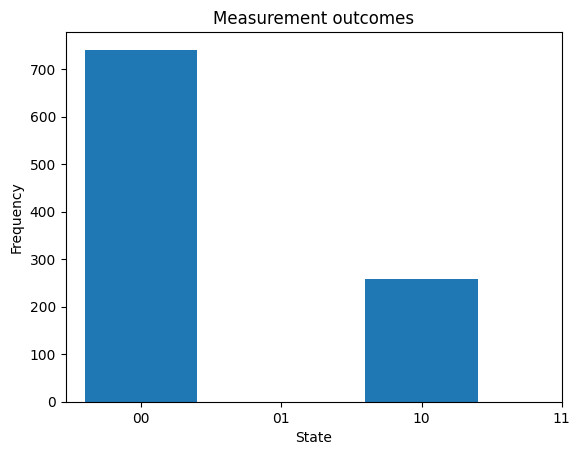

In [ ]:
# Plot the results
counts = result.histogram(key='x')
outcomes = ['00', '01', '10', '11']

plt.bar(counts.keys(), counts.values())
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(range(4), outcomes)
plt.title('Measurement outcomes')
plt.show()

Fidelity of states $\phi$ and $\psi$ = $\left| \langle \phi | \psi \rangle \right|^2$

In [ ]:
prob_0 = np.sum(result.measurements['x']) / len(result.measurements['x'])
fidelity = 1 - 2 * prob_0
print(f"Fidelity of q0 and q1: {fidelity}")

Fidelity of q0 and q1: 0.482


In [ ]:
prob_0 = 0 / len(result.measurements['x'])
fidelity = 1 - 2 * prob_0
print(f"Fidelity of q2 and q3: {fidelity}")

Fidelity of q2 and q3: 1.0
